In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import json
import numpy as np
import cv2


#import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#from skimage.io import imread
from sklearn import preprocessing
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [66]:
categories = open('C:/food-101/food-101/meta/classes.txt').read().split()
cats = random.sample(categories,5)
dir = "C:/food-101/food-101/images/"
#categories = os.listdir(dir)

randomSampleCount = 1000

random.seed(255)
sequence = [i for i in range(1000)]
randList = random.sample(sequence, randomSampleCount)

randomSampled = []
scaleddir = 'C:/food-101/food-101/imagesScaled/'
#for cat in categories:
for cat in categories:
    directory = scaleddir + cat
    path = os.listdir(directory)
    index = 0
    imagesToBeSampled = []
    for images in path:
        index = index + 1
        if(index in randList):
            imagesToBeSampled.append(images)
    randomSampled.append(imagesToBeSampled)
#print(randomSampled[0])

### CNN ###
from sklearn.preprocessing import MinMaxScaler

scaled_X = []
images2 = []

scaleddir = 'C:/food-101/food-101/imagesScaled/'

index = 0
for cat in random.sample(categories, 5):
    directory = scaleddir + cat    
    path = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    index = index + 1
    for images in path:
        toArr = imread(os.path.join(directory, images))
        img_resized = resize(toArr, (100, 100,3))
        #flat.append(toArr)
        scaled_X.append(img_resized)
        images2.append(categories.index(cat))

scaled_X = np.array(scaled_X)

#encode image labels 
le = preprocessing.LabelEncoder()
le.fit(images2)

#train/test split
rs = 45
x_train, x_test, y_train, y_test = train_test_split(
    scaled_X, 
    le.transform(images2), 
    test_size=0.3, 
    random_state=rs, 
    stratify=images2)

array([3, 3, 3, ..., 2, 2, 2], dtype=int64)

CNN Model Selection


Epoch 1/10
110/110 [==============================] - 18s 157ms/step - loss: 1.5523 - accuracy: 0.2903 - val_loss: 1.4347 - val_accuracy: 0.4100
Epoch 2/10
110/110 [==============================] - 17s 155ms/step - loss: 1.3989 - accuracy: 0.4011 - val_loss: 1.3097 - val_accuracy: 0.4673
Epoch 3/10
110/110 [==============================] - 18s 167ms/step - loss: 1.2849 - accuracy: 0.4649 - val_loss: 1.2222 - val_accuracy: 0.5207
Epoch 4/10
110/110 [==============================] - 17s 158ms/step - loss: 1.1766 - accuracy: 0.5286 - val_loss: 1.2822 - val_accuracy: 0.4747
Epoch 5/10
110/110 [==============================] - 17s 158ms/step - loss: 1.0881 - accuracy: 0.5749 - val_loss: 1.1294 - val_accuracy: 0.5540
Epoch 6/10
110/110 [==============================] - 17s 158ms/step - loss: 1.0193 - accuracy: 0.5977 - val_loss: 1.1503 - val_accuracy: 0.5720
Epoch 7/10
110/110 [==============================] - 17s 159ms/step - loss: 0.9461 - accuracy: 0.6317 - val_loss: 1.0327 - val_ac

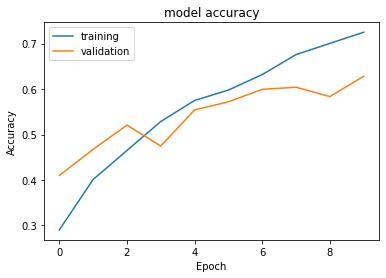

Maximum Validation Accuracy =  0.628000020980835


In [68]:
# MODEL 1
# 4 LAYERS
#Try different batch sizes
model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])
#model_cnn.summary()

## Convert data to tf tensors and train 

x_test_tensor = tf.convert_to_tensor(x_test)
x_train_tensor = tf.convert_to_tensor(x_train)


y_test_tensor = tf.convert_to_tensor(y_test)
y_train_tensor = tf.convert_to_tensor(y_train)

model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #SCC is optimal for multiclass
              metrics=['accuracy'])

history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=20, 
                    validation_data=(x_test_tensor, y_test_tensor))

#Validation Curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

In [37]:
# MODEL 2 
# 2 LAYERS

model_cnn = models.Sequential(
    [
        layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)), #32 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3), activation = 'relu'), #64 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])



model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=10, 
                    validation_data=(x_test_tensor, y_test_tensor))

#Validation Curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 972, in launch_instance
      app.start()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\ryanb\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ryanb\AppData\Local\Temp\ipykernel_18068\1515804455.py", line 25, in <cell line: 25>
      history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=10,
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\ryanb\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 99 which is outside the valid range of [0, 5).  Label values: 99 41 99 99 19 19 30 77 41 30 30 19 30 77 77 77 99 41 30 19 19 77 30 41 30 99 41 19 19 77 99 41
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_7381]

In [7]:
#MODEL 3
# 2 LAYERS, Increase output channels
model_cnn = models.Sequential(
    [
        layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (100,100,3)), #64 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128,(3,3), activation = 'relu'), #128 output channels, (3,3) convolution window
        
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(5),

        
    ])


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn.fit(x_train_tensor, y_train_tensor, epochs=10, 
                    validation_data=(x_test_tensor, y_test_tensor))

#Validation Curves

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

print('Maximum Validation Accuracy = ', max(history.history['val_accuracy']))

Epoch 1/10
125/125 [==============================] - 44s 352ms/step - loss: 1.5284 - accuracy: 0.3006 - val_loss: 1.3627 - val_accuracy: 0.4484
Epoch 2/10
125/125 [==============================] - 43s 341ms/step - loss: 1.2561 - accuracy: 0.4812 - val_loss: 1.1800 - val_accuracy: 0.5395
Epoch 3/10
125/125 [==============================] - 40s 317ms/step - loss: 1.1080 - accuracy: 0.5603 - val_loss: 1.2322 - val_accuracy: 0.4805
Epoch 4/10
125/125 [==============================] - 39s 315ms/step - loss: 1.0272 - accuracy: 0.5813 - val_loss: 1.1174 - val_accuracy: 0.5445
Epoch 5/10
125/125 [==============================] - 39s 315ms/step - loss: 0.9126 - accuracy: 0.6281 - val_loss: 1.1493 - val_accuracy: 0.5546
Epoch 6/10
125/125 [==============================] - 40s 318ms/step - loss: 0.7468 - accuracy: 0.7070 - val_loss: 1.1324 - val_accuracy: 0.5796
Epoch 7/10
125/125 [==============================] - 41s 327ms/step - loss: 0.6199 - accuracy: 0.7595 - val_loss: 1.3418 - val_ac